# Primer carreguem el dataset de spotify


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('./spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


## Pregunta 1
Defineix una xarxa amb una neurona.

Compila el model amb l'optimitzador Adam i defineix una funció de pèrdua adequada.

Entrena el model amb un tamany de lot de 512 i 50 èpoques.

Representa en un gràfic

In [10]:
# Xarxa amb una neurona
model = keras.Sequential([
    layers.Dense(units=1, input_shape=input_shape)
])

In [24]:
# Compila el model amb Adam i defineix la funció

model2.compile(
    optimizer='adam',
    loss='mae',
)

In [25]:
history2=model2.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=512, epochs=50)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2584 - val_loss: 0.2050
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1957 - val_loss: 0.2016
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1913 - val_loss: 0.2003
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1884 - val_loss: 0.2005
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1835 - val_loss: 0.1996
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1836 - val_loss: 0.2010
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1826 - val_loss: 0.1996
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1813 - val_loss: 0.1994
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1797 - val_loss: 0.2004
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1778 - val_loss: 0.1993
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1769 - val_loss: 0.2003
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1737 - 

<Axes: >

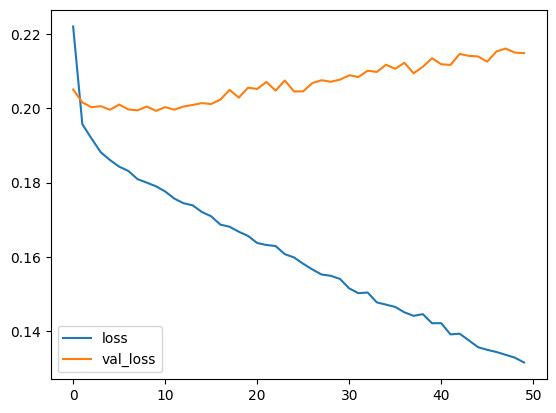

In [32]:
# Gràfic 
history_df=pd.DataFrame(history2.history)

history_df.loc[:,['loss', 'val_loss']].plot()



# Pregunta 3
Afegeix tres capes ocultes amb 128 unitats cadascuna. Torna a entrenar el model i mira les corbes d'aprenentatge.

Ara pareix que estiguen subajustades o sobreentrenades?

In [23]:
# Segon model

model2= keras.Sequential([
    layers.Dense(128, input_shape=input_shape,activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1)
])

c:\Users\Josep\Documents\IA-BIGDATA\PIA\joanGerardEntorn\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
